# 0 Video Conversion

In [ ]:
!ffmpeg\bin\ffmpeg.exe -i data\for_paper\1080p\speed_bag_1080p.y4m -pix_fmt yuv420p -c:v rawvideo -an -s 1920x1080 -y data\for_paper\1080p\speed_bag_1080p.avi

# 1. Singular values

## 1.1 Tucker

### 1.1.1 Generation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy
from cvtcomp.utils import play_video
import os

plt.rcParams['animation.ffmpeg_path'] = r'ffmpeg/bin/ffmpeg.exe'


LOAD_FNAME = r"data/for_paper/1080p/crowd_run_1080p50.y4m"


video, fourcc, fps, size = load_video_to_numpy(LOAD_FNAME)

tensor_video = TensorVideo(
    compression_type='tucker',
    quality=59.9,
    chunk_size=30,
    decoded_data_type=np.uint8,
    verbose=True
)

tensor_video.encode(video)


tensor_video.save(os.path.join("compressed_data", LOAD_FNAME.split(r"/")[-1][:-4]) + "_tucker.ctv")

#restored_video = tensor_video.decode()

### 1.1.2. Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo

FNAMES = [
    r"compressed_data/crowd_run_1080p50_tucker.ctv",
    r"compressed_data/red_kayak_1080p_tucker.ctv",
    r"compressed_data/speed_bag_1080p_tucker.ctv",
]

singular_values = [TensorVideo().load(fname).metadata for fname in FNAMES]

# Костыль убираем некратные обрезки
singular_values[0] = singular_values[0][:-1]

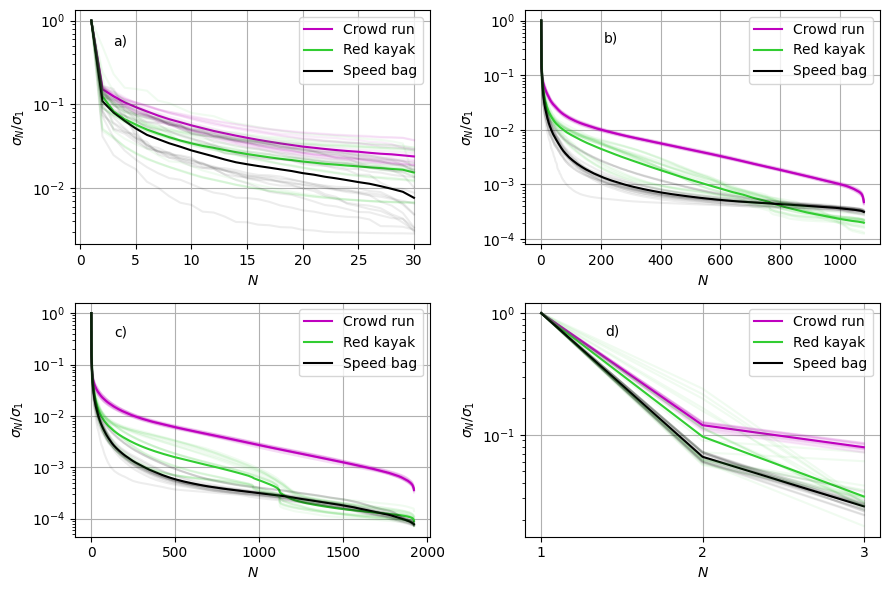

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy
from cvtcomp.utils import play_video

COLORS = ["m", "limegreen", "k"]
LABELS = ["Crowd run", "Red kayak", "Speed bag"]
FIGSIZE = (9, 6)

def plot_sv_tucker(singular_values: list):
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=FIGSIZE)
    
    for ii in range(4):
        axes[ii // 2][ii % 2].set_xlabel("$N$")
        axes[ii // 2][ii % 2].set_ylabel("$\sigma_N / \sigma_1$")
        
        axes[ii // 2][ii % 2].set_yscale("log")
        axes[ii // 2][ii % 2].grid(True)
        
        axes[ii // 2][ii % 2].text(
            [3, 210, 140, 1.4][ii],
            [0.5, 0.4, 0.35, 0.65][ii],
            ["a)", "b)", "c)", "d)"][ii]
        )
        
    average_curves = [[] for _ in range(3)]
    for num, sv in enumerate(singular_values):
        for ii in range(4):
            for jj in range(len(sv)):
                
                if jj == 0:
                    cnt = 1
                    ac = np.log10(sv[jj][ii])
                else:
                    ac += np.log10(sv[jj][ii])
                    cnt += 1
            
            ac = np.power(10, (ac / cnt))
            average_curves[num].append(ac)
            
            axes[ii // 2][ ii % 2].plot(
                np.arange(1, len(ac) + 1),
                ac / ac[0],
                color=COLORS[num],
                label=LABELS[num]
            )
            axes[ii // 2][ ii % 2].legend()
                
        
    # Костыль для выбора отсчетов
        axes[1][1].set_xticks([1,2,3])
    
    for num, sv in enumerate(singular_values):
        for ii in range(len(sv)):
            for jj in range(len(sv[ii])):
                
                axes[jj // 2][jj % 2].plot(
                    np.arange(1, len(sv[ii][jj]) + 1),
                    sv[ii][jj] / sv[ii][jj][0],
                    color=COLORS[num],
                    alpha=0.07,
                )
    plt.tight_layout()
    
    fig.savefig(r"figs/Fig_1_Tacker.jpg", dpi=600)
    
plot_sv_tucker(singular_values)

## 1.2 TT

### 1.2.1 Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy
from cvtcomp.utils import play_video
import os

plt.rcParams['animation.ffmpeg_path'] = r'ffmpeg/bin/ffmpeg.exe'


LOAD_FNAME = r"data/for_paper/1080p/speed_bag_1080p.y4m"


video, fourcc, fps, size = load_video_to_numpy(LOAD_FNAME)

tensor_video = TensorVideo(
    compression_type='tt',
    quality=59.9,
    chunk_size=30,
    decoded_data_type=np.uint8,
    verbose=True
)

tensor_video.encode(video)


tensor_video.save(os.path.join("compressed_data", LOAD_FNAME.split(r"/")[-1][:-4]) + "_tt.ctv")

#restored_video = tensor_video.decode()

### 1.2.2 Plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo

FNAMES = [
    r"compressed_data/crowd_run_1080p50_tt.ctv",
    r"compressed_data/red_kayak_1080p_tt.ctv",
    r"compressed_data/speed_bag_1080p_tt.ctv",
]

singular_values = [TensorVideo().load(fname).metadata for fname in FNAMES]

# Костыль убираем некратные обрезки
singular_values[0] = singular_values[0][:-1]

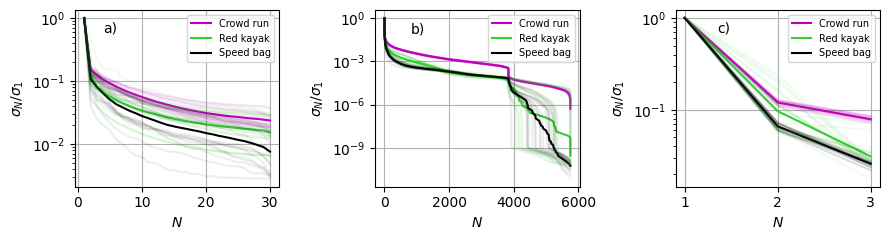

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy
from cvtcomp.utils import play_video

COLORS = ["m", "limegreen", "k"]
LABELS = ["Crowd run", "Red kayak", "Speed bag"]
FIGSIZE = (9, 2.5)

def plot_sv_tt(singular_values: list):
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=FIGSIZE)
    
    for ii in range(3):
        axes[ii].set_xlabel("$N$")
        axes[ii].set_ylabel("$\sigma_N / \sigma_1$")
        
        axes[ii].set_yscale("log")
        axes[ii].grid(True)
        
        axes[ii].text(
            [4, 800, 1.35][ii],
            [0.6, 0.08, 0.7][ii],
            ["a)", "b)", "c)"][ii]
        )
        
    average_curves = [[] for _ in range(3)]
    for num, sv in enumerate(singular_values):
        for ii in range(3):
            for jj in range(len(sv)):
                
                if jj == 0:
                    cnt = 1
                    ac = np.log10(sv[jj][ii])
                else:
                    ac += np.log10(sv[jj][ii])
                    cnt += 1
            
            ac = np.power(10, (ac / cnt))
            average_curves[num].append(ac)
            
            axes[ii].plot(
                np.arange(1, len(ac) + 1),
                ac / ac[0],
                color=COLORS[num],
                label=LABELS[num]
            )
            axes[ii].legend(fontsize=7)
                
    
    for num, sv in enumerate(singular_values):
        for ii in range(len(sv)):
            for jj in range(len(sv[ii])):
                
                axes[jj].plot(
                    np.arange(1, len(sv[ii][jj]) + 1),
                    sv[ii][jj] / sv[ii][jj][0],
                    color=COLORS[num],
                    alpha=0.07,
                )
    plt.tight_layout()
    
    fig.savefig(r"figs/Fig_2_TT.jpg", dpi=600)
    
plot_sv_tt(singular_values)

# 2. Images with artifacts

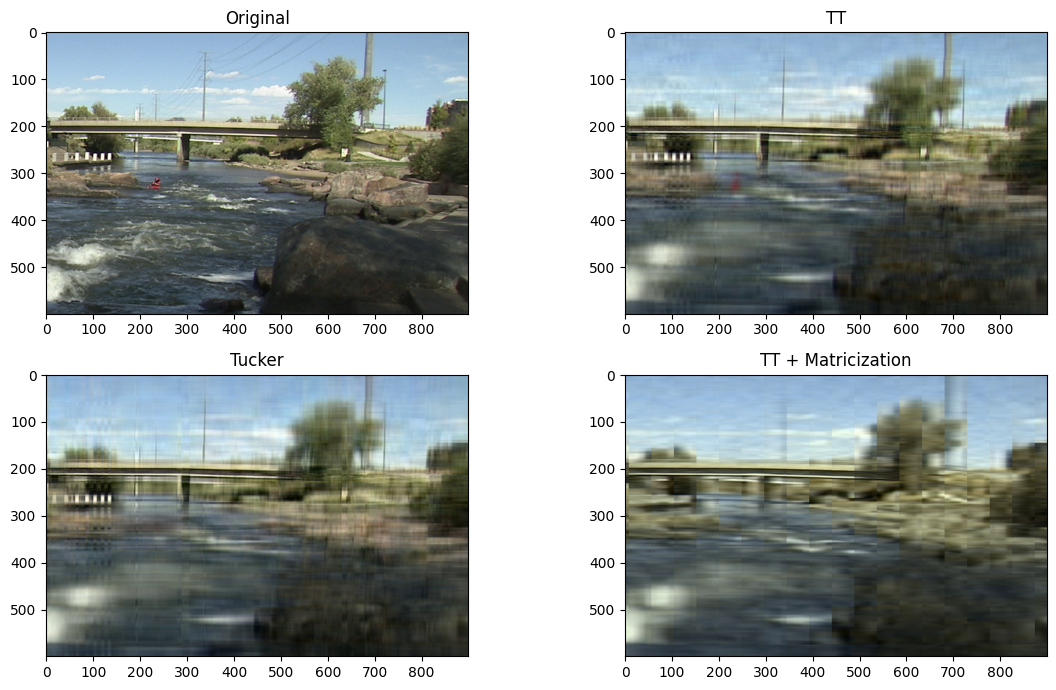

In [52]:
import numpy as np
from cvtcomp.io import load_video_to_numpy
import matplotlib.pyplot as plt

LABELS = ["Original", "TT", "Tucker", "TT + Matricization"]

VIDEO_FNAMES = [
    r"data\for_paper\1080p\red_kayak_1080p.avi",
    r"compressed_data\tt_for_rd\red_kayak_1080p_tt_25.avi",
    r"compressed_data\tucker_for_rd\red_kayak_1080p_tucker_25.avi",
    r"compressed_data\tt_m_for_rd\red_kayak_1080p_tt_25.avi",
]

X_LIMS = [1000, 1900]
Y_LIMS = [0, 600]

FRAME_NUMBER = 290

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

for ii, ax in enumerate(axes.ravel()):
    
    ax.set_title(LABELS[ii])
    
    video, fourcc, fps, size = load_video_to_numpy(VIDEO_FNAMES[ii])
    
    ax.imshow(video[FRAME_NUMBER, Y_LIMS[0]:Y_LIMS[1], X_LIMS[0]:X_LIMS[1], ...])
    
fig.tight_layout()

fig.savefig(r"figs/Fig_3_Artefacts.jpg", dpi=600)

# 3. RD
## 3.0 x264 compression

In [177]:
import subprocess
import os

FOLDERNAME = r"data\for_paper\1080p"
SAVEFOLDERNAME = r"compressed_data\x264_for_rd"
CRFS = [1, 10, 20, 30, 40, 50]

fnames = [fname for fname in os.listdir(FOLDERNAME) if fname[-4:] == ".avi"]

for fname in fnames:
    for crf in CRFS:
        
        command_1 = (
            r"ffmpeg\bin\ffmpeg.exe -i "
            + f"{os.path.join(FOLDERNAME, fname)}"
            + f" -c:v libx264 -preset medium -crf {crf} -c:a copy "
            + f"{os.path.join(SAVEFOLDERNAME, (fname[:-4] + '_crf_' + str(crf) + '.avi'))}"
        )

        print(f"{fname}_{crf}", subprocess.run(command_1, shell=True, capture_output=True).stderr.decode())
        
        command_2 = (
            r"ffmpeg\bin\ffmpeg.exe -i "
            + f"{os.path.join(SAVEFOLDERNAME, (fname[:-4] + '_crf_' + str(crf) + '.avi'))}"
            + f" -c:v rawvideo -pixel_format yuv420p "
            + f"{os.path.join(SAVEFOLDERNAME, ('dec_' + fname[:-4] + '_crf_' + str(crf) + '.avi'))}"
        )
        
        print(f"{fname}_{crf}", subprocess.run(command_2, shell=True, capture_output=True).stderr.decode())

crowd_run_1080p50.avi_1 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libo

crowd_run_1080p50.avi_20 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-lib

crowd_run_1080p50.avi_40 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-lib

red_kayak_1080p.avi_1 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libope

red_kayak_1080p.avi_20 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libop

red_kayak_1080p.avi_40 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libop

speed_bag_1080p.avi_1 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libope

speed_bag_1080p.avi_20 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libop

speed_bag_1080p.avi_40 ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libop

## 3.1 Tensor compression

### 3.1.1 Tucker

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy, save_video_from_numpy
from cvtcomp.utils import play_video
import os
plt.rcParams['animation.ffmpeg_path'] = r'ffmpeg/bin/ffmpeg.exe'

LOAD_FNAMES = [
    r"data/for_paper/1080p/crowd_run_1080p50.avi",
    r"data/for_paper/1080p/red_kayak_1080p.avi",
    r"data/for_paper/1080p/speed_bag_1080p.avi",
    ]
QUALITIES = [15, 20, 25, 30, 35, 40]

for load_fname in LOAD_FNAMES:

    video, fourcc, fps, size = load_video_to_numpy(load_fname)

    for q in QUALITIES:

        tensor_video = TensorVideo(
            compression_type='tucker',
            quality=q,
            chunk_size=30,
            decoded_data_type=np.uint8,
            verbose=False,
        )

        tensor_video.encode(video)

        tensor_video.save(
            os.path.join(
                r"compressed_data\tucker_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tucker_" + f"{str(q)}" + ".ctv"
            )
        )

        save_video_from_numpy(
            os.path.join(
                r"compressed_data\tucker_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tucker_" + f"{str(q)}" + ".avi"
            ),
            tensor_video.decode(),
            fourcc,
            fps,
            size
        )

In [6]:
from cv2 import PSNR

tensor_video = TensorVideo().load(r"compressed_data\tucker_for_rd\crowd_run_1080p50_tucker_25.ctv")
video, fourcc, fps, size = load_video_to_numpy(r"data/for_paper/1080p/crowd_run_1080p50.avi")

PSNR(tensor_video.decode(), video)

25.11000049540761

### 3.1.2 TT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy, save_video_from_numpy
from cvtcomp.utils import play_video
import os
plt.rcParams['animation.ffmpeg_path'] = r'ffmpeg/bin/ffmpeg.exe'

LOAD_FNAMES = [
    r"data/for_paper/1080p/crowd_run_1080p50.avi",
    r"data/for_paper/1080p/red_kayak_1080p.avi",
    r"data/for_paper/1080p/speed_bag_1080p.avi",
    ]
QUALITIES = [15, 20, 25, 30, 35, 40]

for load_fname in LOAD_FNAMES:

    video, fourcc, fps, size = load_video_to_numpy(load_fname)

    for q in QUALITIES:

        tensor_video = TensorVideo(
            compression_type='tt',
            quality=q,
            chunk_size=30,
            decoded_data_type=np.uint8,
            verbose=False,
        )

        tensor_video.encode(video)

        tensor_video.save(
            os.path.join(
                r"compressed_data\tt_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tt_" + f"{str(q)}" + ".ctv"
            )
        )

        save_video_from_numpy(
            os.path.join(
                r"compressed_data\tt_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tt_" + f"{str(q)}" + ".avi"
            ),
            tensor_video.decode(),
            fourcc,
            fps,
            size
        )

In [2]:
from cv2 import PSNR

tensor_video = TensorVideo().load(r"compressed_data\tt_for_rd\speed_bag_1080p_tt_25.ctv")
video, fourcc, fps, size = load_video_to_numpy(r"data/for_paper/1080p/speed_bag_1080p.avi")

PSNR(tensor_video.decode(), video)

25.24117602393956

## 3.2 Metrics calculation

In [1]:
import subprocess
import os

LOAD_FNAMES = [
    r"data/for_paper/1080p/crowd_run_1080p50.avi",
    r"data/for_paper/1080p/red_kayak_1080p.avi",
    r"data/for_paper/1080p/speed_bag_1080p.avi",
    ]

COMPRESSED_FOLDER = "compressed_data/tt_m_for_rd"

logfname = os.path.join(COMPRESSED_FOLDER, "metrics.txt")

with open(logfname, "w") as output_stream:
    
    output_stream.write(f"{COMPRESSED_FOLDER.split('/')[-1]}\n")
    
    for fname in LOAD_FNAMES:
        output_stream.write("#################################\n")
        output_stream.write(fname.split('/')[-1].split('.')[0] + "\n")
        
        compressed_fnames = [f for f in os.listdir(COMPRESSED_FOLDER) if (f[-4:] == ".avi") and (f.split("_")[0] == fname.split("/")[-1].split("_")[0])]       
        
        cr_all = []
        psnr_all = []
        ssim_all = []
        
        for comp_fname in compressed_fnames:
            output_stream.write(f"QUALITY_PARAM = {comp_fname.split('_')[-1].split('.')[0]}" + "\n")
            
            if "x264" in COMPRESSED_FOLDER:
                
                cr = os.path.getsize(os.path.join(COMPRESSED_FOLDER, comp_fname)) / os.path.getsize(fname)
                output_stream.write(f"CR = {cr}\n")
            else:
                cr = os.path.getsize(os.path.join(COMPRESSED_FOLDER, comp_fname[:-4] + '.ctv')) / os.path.getsize(fname)
                output_stream.write(f"CR = {cr}\n")
                
            cr_all.append(cr)
            
            if "x264" in COMPRESSED_FOLDER:
                comp_fname_full = os.path.join(COMPRESSED_FOLDER, 'dec_' + comp_fname)
            else:
                comp_fname_full = os.path.join(COMPRESSED_FOLDER, comp_fname)
             
            result = subprocess.run(
                [
                    r'ffmpeg\bin\ffmpeg.exe',
                    r'-i',
                    f'{comp_fname_full}',
                    r'-i',
                    f'{fname}',
                    r'-filter_complex',
                    r'[0:v]setpts=N[out0];[1:v]setpts=N[out1];[out0][out1]psnr',
                    r'-f',
                    r'null',
                    r'-',
                ],
                capture_output=True
            ).stderr.decode()

            print(result)

            final_result = result.split("\n")[-2]
            
            psnr_all.append(float(final_result.split(" ")[-3][8:]))

            print("###########################################", sep='\n')
            
            output_stream.write(final_result)
            
            result = subprocess.run(
                [
                    r'ffmpeg\bin\ffmpeg.exe',
                    r'-i',
                    f'{comp_fname_full}',
                    r'-i',
                    f'{fname}',
                    r'-filter_complex',
                    r'[0:v]setpts=N[out0];[1:v]setpts=N[out1];[out0][out1]ssim',
                    r'-f',
                    r'null',
                    r'-',
                ],
                capture_output=True
            ).stderr.decode()

            print(result)

            final_result = result.split("\n")[-2]
            
            ssim_all.append(float(final_result.split(" ")[-2][4:]))
            
            
            print("###########################################", sep='\n')
            
            output_stream.write(final_result)
        output_stream.write(f"########## Summary\n")
        output_stream.write(f"CR = {cr_all}\n")
        output_stream.write(f"PSNR_AVG = {psnr_all}\n")
        output_stream.write(f"SSIM_AVG = {ssim_all}\n")
        output_stream.write(f"##########\n")


ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

## 3.3 Plotting

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data = {
    "crowd_run":{
        "tucker":{
            "cr": np.array([0.0009043290050655271, 0.042412210517545595, 0.5991736859689583, 2.081346129773616, 4.000818296126872, 5.770303090859234]),
            "psnr": np.array([18.913129, 23.632843, 28.533857, 33.542242, 38.525816, 41.717829]),
            "ssim": np.array([0.474070, 0.591046, 0.818356, 0.937634, 0.981391, 0.993561]),
        },
        "tt":{
            "cr": np.array([0.0011195057209761401, 0.09896207466642266, 0.7573370687137255, 2.010127137779904, 3.5074882052685523, 4.804962232511677]),
            "psnr": np.array([18.985409, 23.838544, 28.936618, 33.948828, 38.609710, 42.081040]),
            "ssim": np.array([0.474959, 0.608226, 0.823066, 0.931678, 0.975907, 0.992278]),       
        },
        "x264":{
            "cr": np.array([0.3896051987613277, 0.17006559099051766, 0.03049381741695959, 0.007493237356031775, 0.001946005835089301, 0.0005860870872657705]),
            "psnr": np.array([51.984085, 42.989106, 35.926679, 30.428111, 25.559021, 22.422421]),
            "ssim": np.array([0.997960, 0.984070, 0.933037, 0.844906, 0.686020, 0.540571]),  
        },
    },
##################
    "red_kayak":{
        "tucker":{
            "cr": np.array([0.00015797413125770727, 0.0011044020699831876, 0.04032231717845504, 0.22121843396618085, 0.5599796974588499, 1.2137365753813947]),
            "psnr": np.array([20.733924, 23.921295, 28.291042, 32.999385, 37.394092, 40.495458]),
            "ssim": np.array([0.770962, 0.785322, 0.829108, 0.903855, 0.956083, 0.981927]), 
        },
        "tt":{
            "cr": np.array([0.0003143108771146679, 0.0031996586368989556, 0.08030260129844967, 0.29963074347744195, 0.648714055206745, 1.2303124087462922]),
            "psnr": np.array([20.610158, 24.107216, 28.488560, 33.116565, 37.602284, 40.729552]),
            "ssim": np.array([0.770554, 0.788078, 0.839292, 0.912893, 0.961832, 0.984287]),
        },
        "x264":{
            "cr": np.array([0.25477265158653173, 0.1100536836460156, 0.03100431727936491, 0.008772399168597173, 0.00199307198603996, 0.00059302342760766]),
            "psnr": np.array([56.305350, 49.411611, 42.378417, 36.580689, 30.606167, 27.394055]),
            "ssim": np.array([0.998641, 0.993515, 0.973366, 0.934653, 0.848339, 0.782950]),  
        },
    },
##############
    "speed_bag":{
        "tucker":{
            "cr": np.array([0.00024724181131970227, 0.0010326588695633554, 0.0048891278966451835, 0.026608117404623596, 0.1315417877116844, 0.6493037006456633]),
            "psnr": np.array([19.772030, 23.763262, 28.313970, 33.019258, 37.389842, 40.832510]),
            "ssim": np.array([0.872868, 0.890950, 0.909101, 0.933916, 0.959071, 0.978302]),
        },
        "tt":{
            "cr": np.array([0.0005709359276788832, 0.00403233087470167, 0.023637940897985675, 0.09499298283624262, 0.2831605505185496, 0.8085932886084622]),
            "psnr": np.array([19.880115, 23.924594, 28.394996, 33.148227, 37.581056, 41.121687]),
            "ssim": np.array([0.873966, 0.894593, 0.916135, 0.941524, 0.964858, 0.981973]),       
        },
        "x264":{
            "cr": np.array([0.26140260500041845, 0.09479688633438517, 0.010373229644155272, 0.002466927824016565, 0.0009421164767884127, 0.0003928326162000782]),
            "psnr": np.array([58.052267, 50.828396, 44.348090, 41.087739, 35.957944, 29.860308]),
            "ssim": np.array([0.998816, 0.993807, 0.975171, 0.964609, 0.940566, 0.895256]),  
        },
    },
}

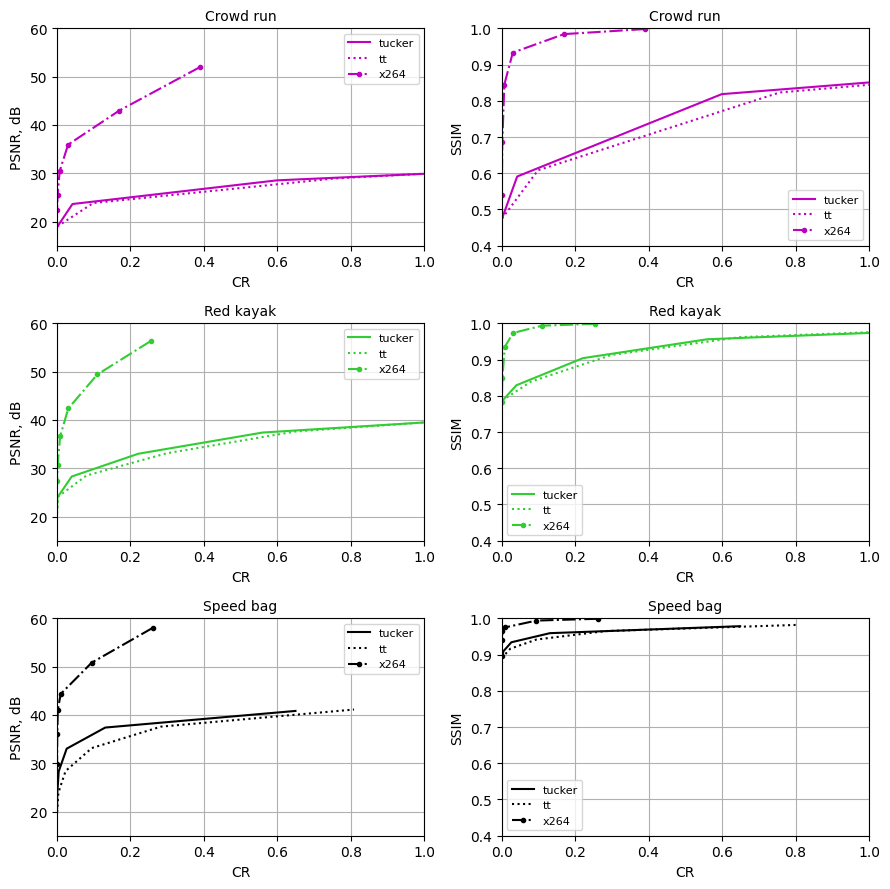

In [5]:
COLORS = ["m", "limegreen", "k"]
LABELS = ["Crowd run", "Red kayak", "Speed bag"]
LINESTYLES = ["-", ":", ".-."]

LABLES = ["a)", "b)","c)", "d)","e)", "f)"]

data_labels = ["crowd_run", "red_kayak", "speed_bag",]


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))

for ii, ax in enumerate(axes.ravel()):
    ax.grid(True)
    ax.set_xlabel("CR")
    ax.set_xlim([0, 1])
    ax.set_title(LABELS[ii // 2], fontsize=10)
    
    if ii % 2 == 0:
        ax.set_ylabel("PSNR, dB")
        ax.set_ylim([15, 60])
        
    else:
        ax.set_ylabel("SSIM")
        ax.set_ylim([0.4, 1])
    
    sub_data = data[data_labels[ii // 2]]
    if ii % 2 == 0:
        ax.plot(
            sub_data["tucker"]["cr"],
            sub_data["tucker"]["psnr"],
            LINESTYLES[0],
            color=COLORS[ii // 2],
            label="tucker",
        )
        
        ax.plot(
            sub_data["tt"]["cr"],
            sub_data["tt"]["psnr"],
            LINESTYLES[1],
            color=COLORS[ii // 2],
            label="tt",
        )
            
        ax.plot(
            sub_data["x264"]["cr"],
            sub_data["x264"]["psnr"],
            LINESTYLES[2],
            color=COLORS[ii // 2],
            label="x264",
        )
    else:

        ax.plot(
            sub_data["tucker"]["cr"],
            sub_data["tucker"]["ssim"],
            LINESTYLES[0],
            color=COLORS[ii // 2],
            label="tucker",
        )
        ax.plot(
            sub_data["tt"]["cr"],
            sub_data["tt"]["ssim"],
            LINESTYLES[1],
            color=COLORS[ii // 2],
            label="tt",
        )
            
        ax.plot(
            sub_data["x264"]["cr"],
            sub_data["x264"]["ssim"],
            LINESTYLES[2],
            color=COLORS[ii // 2],
            label="x264",
        )
    ax.legend(fontsize=8)
fig.tight_layout()

fig.savefig(r"figs/Fig_4_RD.jpg", dpi=600)

# 4. Resolution

In [1]:
# Не тратим на это время

# 5. Matricization

## 5.1 Compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvtcomp.base import TensorVideo
from cvtcomp.io import load_video_to_numpy, save_video_from_numpy
from cvtcomp.utils import play_video
import os
plt.rcParams['animation.ffmpeg_path'] = r'ffmpeg/bin/ffmpeg.exe'

LOAD_FNAMES = [
    r"data/for_paper/1080p/crowd_run_1080p50.avi",
    r"data/for_paper/1080p/red_kayak_1080p.avi",
    r"data/for_paper/1080p/speed_bag_1080p.avi",
    ]

HEIGHT_SPLIT = 30

WIDTH_SPLIT = 40

QUALITIES = [15, 20, 25, 30, 35, 40]

for load_fname in LOAD_FNAMES:

    video, fourcc, fps, size = load_video_to_numpy(load_fname)
    shape_original = video.shape
    shape_matriicized = (
        shape_original[0],
        HEIGHT_SPLIT,
        shape_original[1] // HEIGHT_SPLIT,
        WIDTH_SPLIT,
        shape_original[2] // WIDTH_SPLIT,
        shape_original[3]
    )
    video = video.reshape(shape_matriicized)
    
    print(video.shape)
    
    for q in QUALITIES:
        pass
        tensor_video = TensorVideo(
            compression_type="tt",
            quality=q,
            chunk_size=30,
            decoded_data_type=np.uint8,
            verbose=False,
        )

        tensor_video.encode(video)

        tensor_video.save(
            os.path.join(
                r"compressed_data\tt_m_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tt_" + f"{str(q)}" + ".ctv"
            )
        )

        save_video_from_numpy(
            os.path.join(
                r"compressed_data\tt_m_for_rd",
                load_fname.split(r"/")[-1][:-4] + "_tt_" + f"{str(q)}" + ".avi"
            ),
            tensor_video.decode().reshape(shape_original),
            fourcc,
            fps,
            size
        )

(500, 30, 36, 40, 48, 3)
(570, 30, 36, 40, 48, 3)
(570, 30, 36, 40, 48, 3)


## 5.2 Plotting

In [7]:
import numpy as np
import matplotlib.pyplot as plt


data = {
    "crowd_run":{
        "tucker":{
            "cr": np.array([0.0009043290050655271, 0.042412210517545595, 0.5991736859689583, 2.081346129773616, 4.000818296126872, 5.770303090859234]),
            "psnr": np.array([18.913129, 23.632843, 28.533857, 33.542242, 38.525816, 41.717829]),
            "ssim": np.array([0.474070, 0.591046, 0.818356, 0.937634, 0.981391, 0.993561]),
        },
        "tt":{
            "cr": np.array([0.0011195057209761401, 0.09896207466642266, 0.7573370687137255, 2.010127137779904, 3.5074882052685523, 4.804962232511677]),
            "psnr": np.array([18.985409, 23.838544, 28.936618, 33.948828, 38.609710, 42.081040]),
            "ssim": np.array([0.474959, 0.608226, 0.823066, 0.931678, 0.975907, 0.992278]),       
        },
        "tt_m":{
            "cr": np.array([0.0012971057447968308, 0.10247839721823016, 0.7368373634714968, 1.920863649779633, 3.3999802893403492, 4.67502060445638]),
            "psnr": np.array([19.613475, 24.058134, 29.0043, 33.980133, 38.549828, 41.384782]),
            "ssim": np.array([0.47732, 0.618572, 0.826674, 0.929747, 0.974231, 0.99011]),  
        },
    },
##################
    "red_kayak":{
        "tucker":{
            "cr": np.array([0.00015797413125770727, 0.0011044020699831876, 0.04032231717845504, 0.22121843396618085, 0.5599796974588499, 1.2137365753813947]),
            "psnr": np.array([20.733924, 23.921295, 28.291042, 32.999385, 37.394092, 40.495458]),
            "ssim": np.array([0.770962, 0.785322, 0.829108, 0.903855, 0.956083, 0.981927]), 
        },
        "tt":{
            "cr": np.array([0.0003143108771146679, 0.0031996586368989556, 0.08030260129844967, 0.29963074347744195, 0.648714055206745, 1.2303124087462922]),
            "psnr": np.array([20.610158, 24.107216, 28.488560, 33.116565, 37.602284, 40.729552]),
            "ssim": np.array([0.770554, 0.788078, 0.839292, 0.912893, 0.961832, 0.984287]),
        },
        "tt_m":{
            "cr": np.array([3.127389194460902e-05, 0.0018381864949663688, 0.06453567241958014, 0.23641937799179374, 0.5739831690295014, 1.233550446952462]),
            "psnr": np.array([21.396051, 24.734794, 28.803585, 33.334607, 37.727384, 40.725576]),
            "ssim": np.array([0.76977, 0.782727, 0.833159, 0.907427, 0.957702, 0.982039]),  
        },
    },
##############
    "speed_bag":{
        "tucker":{
            "cr": np.array([0.00024724181131970227, 0.0010326588695633554, 0.0048891278966451835, 0.026608117404623596, 0.1315417877116844, 0.6493037006456633]),
            "psnr": np.array([19.772030, 23.763262, 28.313970, 33.019258, 37.389842, 40.832510]),
            "ssim": np.array([0.872868, 0.890950, 0.909101, 0.933916, 0.959071, 0.978302]),
        },
        "tt":{
            "cr": np.array([0.0005709359276788832, 0.00403233087470167, 0.023637940897985675, 0.09499298283624262, 0.2831605505185496, 0.8085932886084622]),
            "psnr": np.array([19.880115, 23.924594, 28.394996, 33.148227, 37.581056, 41.121687]),
            "ssim": np.array([0.873966, 0.894593, 0.916135, 0.941524, 0.964858, 0.981973]),       
        },
        "tt_m":{
            "cr": np.array([5.74675460991646e-05, 0.0006152902897677277, 0.005412732500421532, 0.03556593030570511, 0.1765486346279704, 0.7878843256150385]),
            "psnr": np.array([20.325092, 24.325088, 28.648301, 33.3758, 37.66715, 40.921082]),
            "ssim": np.array([0.861896, 0.873572, 0.900751, 0.931992, 0.960314, 0.979942]),  
        },
    },
}

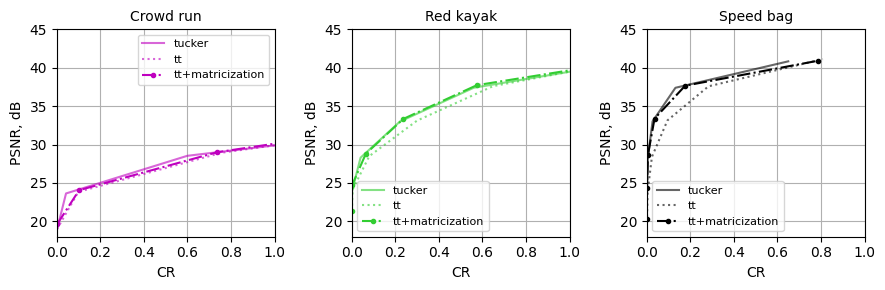

In [15]:
COLORS = ["m", "limegreen", "k"]
LABELS = ["Crowd run", "Red kayak", "Speed bag"]
LINESTYLES = ["-", ":", ".-."]

LABLES = ["a)", "b)","c)", "d)","e)", "f)"]

data_labels = ["crowd_run", "red_kayak", "speed_bag",]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

for ii, ax in enumerate(axes.ravel()):
    ax.grid(True)
    ax.set_xlabel("CR")
    ax.set_xlim([0, 1])
    ax.set_title(LABELS[ii], fontsize=10)
    
    ax.set_ylabel("PSNR, dB")
    ax.set_ylim([18, 45])

    
    sub_data = data[data_labels[ii]]

    ax.plot(
        sub_data["tucker"]["cr"],
        sub_data["tucker"]["psnr"],
        LINESTYLES[0],
        color=COLORS[ii],
        label="tucker",
        alpha=0.6
    )

    ax.plot(
        sub_data["tt"]["cr"],
        sub_data["tt"]["psnr"],
        LINESTYLES[1],
        color=COLORS[ii],
        label="tt",
        alpha=0.6
    )

    ax.plot(
        sub_data["tt_m"]["cr"],
        sub_data["tt_m"]["psnr"],
        LINESTYLES[2],
        color=COLORS[ii],
        label="tt+matricization",
    )
    ax.legend(fontsize=8)
fig.tight_layout()

fig.savefig(r"figs/Fig_5_RD_m_2.jpg", dpi=600)

# 6. Other tests

## 6.1 Overhead for ctv

In [17]:
from cvtcomp.base import TensorVideo
import os

TESTFOLDER = r"compressed_data\tt_for_rd"

filenames = [filename for filename in os.listdir(TESTFOLDER) if filename[-4:] == ".ctv"]

for fname in filenames:

    tensor_video = TensorVideo().load(os.path.join(TESTFOLDER, fname))
    tensor_video.encoded_data_size

    print(f"{fname}:  ", (os.path.getsize(os.path.join(TESTFOLDER, fname)) - tensor_video.encoded_data_size) / os.path.getsize(os.path.join(TESTFOLDER, fname)))

crowd_run_1080p50_tt_15.ctv:   0.001829327479485399
crowd_run_1080p50_tt_20.ctv:   2.1863748149321433e-05
crowd_run_1080p50_tt_25.ctv:   2.88582697788241e-06
crowd_run_1080p50_tt_30.ctv:   1.0879061803324102e-06
crowd_run_1080p50_tt_35.ctv:   6.234745802309036e-07
crowd_run_1080p50_tt_40.ctv:   4.5511902708578504e-07
red_kayak_1080p_tt_15.ctv:   0.006052862503297401
red_kayak_1080p_tt_20.ctv:   0.0006321359885630276
red_kayak_1080p_tt_25.ctv:   2.593902046040855e-05
red_kayak_1080p_tt_30.ctv:   6.993206042915368e-06
red_kayak_1080p_tt_35.ctv:   3.243962457451196e-06
red_kayak_1080p_tt_40.ctv:   1.7159645077052988e-06
speed_bag_1080p_tt_15.ctv:   0.0033944519086382676
speed_bag_1080p_tt_20.ctv:   0.0005078950331614473
speed_bag_1080p_tt_25.ctv:   8.80005016601266e-05
speed_bag_1080p_tt_30.ctv:   2.1987004486886758e-05
speed_bag_1080p_tt_35.ctv:   7.392002146489225e-06
speed_bag_1080p_tt_40.ctv:   2.608129856892431e-06


In [180]:
!ffmpeg\bin\ffmpeg.exe -i compressed_data\x264_for_rd\dec_crowd_run_1080p50_crf_50.avi -c:v rawvideo -pixel_format yuv420p compressed_data\x264_for_rd\dec_crowd_run_1080p50_crf_50.yuv

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

In [195]:
#! ffmpeg\bin\ffmpeg.exe -i compressed_data\x264_for_rd\dec_crowd_run_1080p50_crf_1.avi -i data\for_paper\1080p\crowd_run_1080p50.avi -lavfi "ssim;[0:v][1:v]psnr" -f null -
! ffmpeg\bin\ffmpeg.exe -i compressed_data\x264_for_rd\dec_crowd_run_1080p50_crf_1.yuv -i data\for_paper\1080p\crowd_run_1080p50.y4m -lavfi "ssim;[0:v][1:v]psnr" -f null -

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l

In [189]:
! ffmpeg\bin\ffprobe.exe -v error -select_streams v:0 -count_frames -show_entries stream=nb_read_frames -print_format csv data\for_paper\1080p\crowd_run_1080p50.avi

stream,500


In [214]:
!ffmpeg\bin\ffmpeg.exe -i compressed_data\x264_for_rd\dec_crowd_run_1080p50_crf_1.avi -i data\for_paper\1080p\crowd_run_1080p50.avi -filter_complex "[0:v]setpts=N[out0];[1:v]setpts=N[out1];[out0][out1]ssim" -f null -v info -

ffmpeg version 5.1-essentials_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-libass --enable-libfreetype --enable-libfribidi --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-d3d11va --enable-dxva2 --enable-libmfx --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-libmp3lame --enable-libtheora --enable-libvo-amrwbenc --enable-libgsm --enable-libopencore-amrnb --enable-l